# GRIP Task - 3
## Predicting the optimum number of clusters from ‘Iris’ dataset and representing it visually
________

### Importing libraries

In [16]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Load the Iris dataset

In [17]:
iris = datasets.load_iris()
X=iris.data
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df.shape

(150, 4)

In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [23]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Heat Map Visualization

Text(30.453124999999993, 0.5, 'sepal length  sepal width  petal length  petal width')

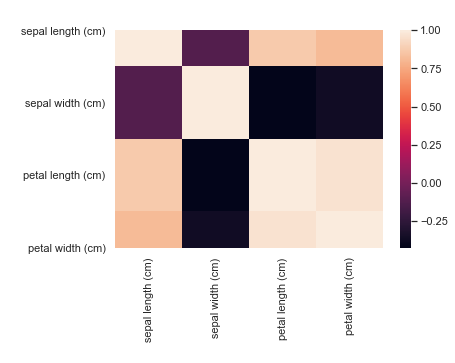

In [24]:
corr=df.corr()
sns.heatmap(corr)

plt.xlabel("sepal length  sepal width  petal length  petal width",color='white')
plt.ylabel("sepal length  sepal width  petal length  petal width",color='white')

In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3D Visualization of Data

Text(0.5, 0.92, 'K Means')

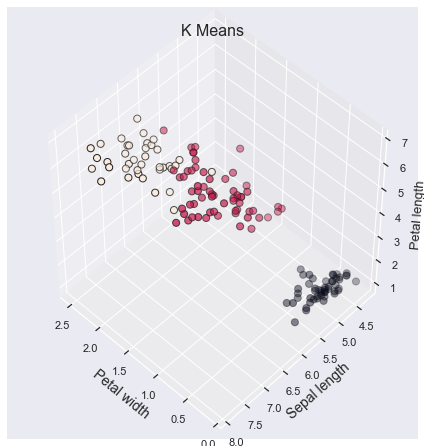

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
labels = kmeans.labels_

fig = plt.figure(1, figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],c=labels.astype(np.float),edgecolor="k", s=50)
ax.set_xlabel("Petal width", fontsize=14)
ax.set_ylabel("Sepal length", fontsize=14)
ax.set_zlabel("Petal length", fontsize=13)
plt.title("K Means", fontsize=16)

In [27]:
kmeans.inertia_

78.85144142614601

### Finding the optimal number of clusters using KMeans Algorithm and plotting an **elbow** graph

Text(0, 0.5, 'SSE')

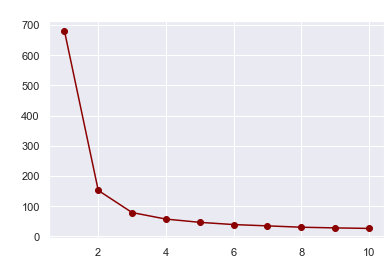

In [28]:
SSE=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1,11),SSE, marker='o', color='darkred')

plt.title('THE ELBOW METHOD', color='white')
plt.xlabel('Number of clusters', color='white')
plt.ylabel('SSE', color='white')

_The elbow points at 3. Hence, optimal number of clusters = 3_

### Applying KMeans to the dataset i.e _final prediction and visualization_

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

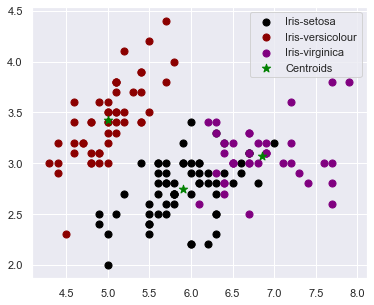

In [30]:
plt.figure(figsize=(6, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'black', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50, c = 'darkred', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 75, c = 'green', label = 'Centroids', marker='*')

plt.legend()